In [1]:
using JLD, Dates
using Plots
using Statistics


gen = 2

2

In [8]:
Dat_wf = load("Data\\KSE_sol_wienerfilter$gen.jld")
h_wf = Dat_wf["dat_h_wf"]

d, nu, M_out = size(h_wf)

H_wf = zeros(d*M_out,nu)
for i = 1:M_out
    H_wf[d*(i-1)+1:d*i,:] = h_wf[:,:,i]
end

In [9]:
Dat_wf_short = load("Data\\KSE_sol_wienerfilter_short$gen.jld")
h_wf_short = Dat_wf_short["dat_h_wf"]

d, nu, M_out = size(h_wf_short)

H_wf_short = zeros(d*M_out,nu)
for i = 1:M_out
    H_wf_short[d*(i-1)+1:d*i,:] = h_wf_short[:,:,i]
end

In [34]:
l = zeros(15)
i=1
for j = 1:5
    for k = j:5
        l[i] = 10 + 5*(j-1) + k
        i += 1
    end
end
cols = Int64.([1:10; l])

ΔH_wf = zeros(size(H_wf_short))
for i=1:25
    ΔH_wf[:,i] = (H_wf[:,cols[i]] - H_wf_short[:,i])./H_wf[:,cols[i]]
end
ΔH_wf

100×25 Array{Float64,2}:
  -0.000226453   2.34187    …   0.206878     0.334912     5.20318
  -2.84438      -0.0518017     -4.16371      0.888677     1.84401
   0.777959      1.08026       -1.57272      0.320823    -0.113401
   1.17014       0.621629       0.110283     0.549354     0.300817
 -12.2071        0.667687      -0.0222446    0.228985   -11.368
   0.863184      1.12937    …   0.0140523   -0.0271986    0.671671
   0.440577      1.54496        2.38826      0.955808     0.869837
  -0.474325      1.21413        0.14519     -0.448598     6.07926
   0.916869      1.10262       -0.171641     0.467033     0.223305
   0.227798      0.0209474      0.00448052   0.337629    -2.36764
   1.80814       1.28268    …  -2.2752      -0.0865305    0.546444
   0.803477      0.620086       1.52238      1.06982      0.789353
   1.94782       1.13406       -0.0367727   -0.533189     2.78878
   ⋮                        ⋱                           
   1.32132       1.01292       -1.22171      1.12804   

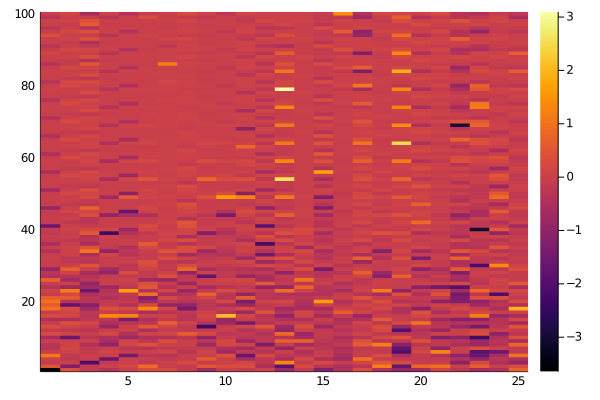

In [36]:
heatmap(log.(10,abs.(ΔH_wf)))